<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%EC%98%81%EC%96%B4%ED%86%A0%ED%81%B0%ED%99%94(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영어 자연어처리(NLP)

## 1. 토큰화(tokenization)

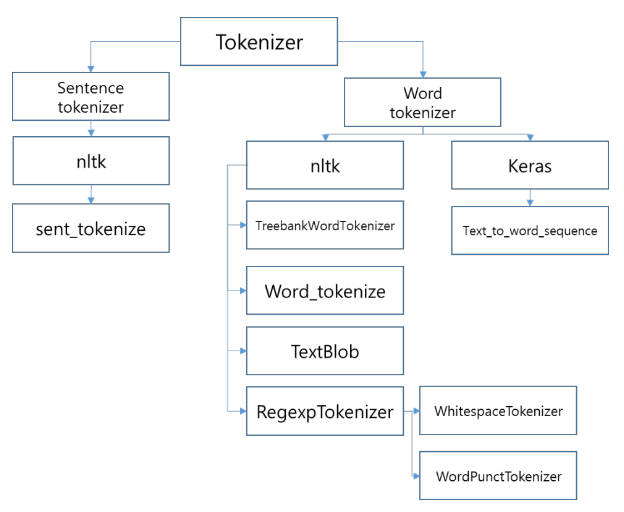

### 1) 단어 토큰화(Word Tokenization)*이탤릭체 텍스트*

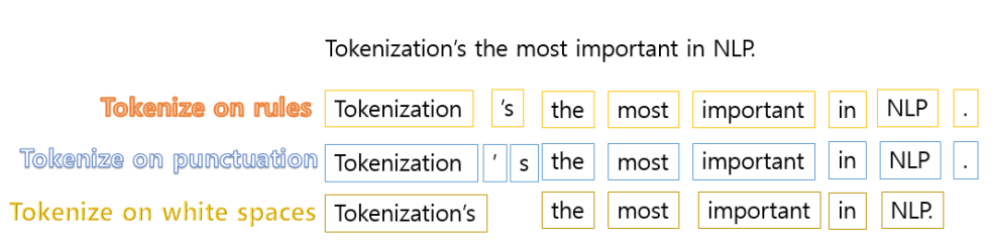

* python의 split() 함수 이용: whitespace 기준

In [1]:
sentence = "Garbage in, Garbage out"

In [2]:
tokens = [x for x in sentence.split(' ')]
tokens

['Garbage', 'in,', 'Garbage', 'out']

In [ ]:
sentence = sentence.replace(",", "")
tokens = [x for x in sentence.split(' ')]
tokens

In [3]:
# "," 제거 후 토큰화
sentence = sentence.replace(",", "")
tokens = [x for x in sentence.split(' ')]
tokens

['Garbage', 'in', 'Garbage', 'out']

###### nltk를 이용한 토큰화



I'm, Don't, Tom's 등 아포스트로피(" ' ")가 특별한 기능(말줄임)을 하고 있을 때 " ' "를 제거하면 토큰화에 문제가 발생





i'm의 경우 I'm, Im, I m, I 라는 경우의 수가 존재

* nltk, word_tokenize()를 이용한 토큰화: 구두점을 기준

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
sentence = "Garbage in, Garbage out"
tokens = word_tokenize(sentence)
tokens

['Garbage', 'in', ',', 'Garbage', 'out']

In [9]:
sentence2 = "Kaneinin-sama, please play with me just one game."
token2 = word_tokenize(sentence2)
token2

['Kaneinin-sama',
 ',',
 'please',
 'play',
 'with',
 'me',
 'just',
 'one',
 'game',
 '.']

> "Don't waste your youth. you're not always young"

In [10]:
sentence = "Don't waste your youth. You're not always young."
tokens = word_tokenize(sentence)
tokens

['Do',
 "n't",
 'waste',
 'your',
 'youth',
 '.',
 'You',
 "'re",
 'not',
 'always',
 'young',
 '.']

In [12]:
sentence = "Ukrainian HIMARS overnight hit more rail infrastructure near Ilovais'k."
tokens = word_tokenize(sentence)
tokens

['Ukrainian',
 'HIMARS',
 'overnight',
 'hit',
 'more',
 'rail',
 'infrastructure',
 'near',
 'Ilovais',
 "'",
 'k',
 '.']

* Treebank Tokenization: 표준 토큰화

In [13]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

In [15]:
sentence = "Don't waste your youth. You're not always young."
tokens = tokenizer.tokenize(sentence)
tokens

['Do',
 "n't",
 'waste',
 'your',
 'youth.',
 'You',
 "'re",
 'not',
 'always',
 'young',
 '.']

> 첫 번째 규칙은 "하이픈으로 구성된 단어는 하나로 유지한다.", 
> 두 번째 규칙은 "아파 스트로 피로 접어가 함께하는 단어는 분리한다."

* TextBlob을 이용한 토큰화

In [20]:
from textblob import TextBlob

sentence = "Don't waste your youth. You're not always young."

blob = TextBlob(sentence)
blob.words


WordList(['Do', "n't", 'waste', 'your', 'youth', 'You', "'re", 'not', 'always', 'young'])

#### RegexpTokenizer: 정규 표현식을 이용한 토큰화


In [21]:
# 문자 최소 1개 이상인 것: [\w]+
from nltk.tokenize import RegexpTokenizer

sentence = "Don't waste your youth. You're not always young."
tokenizer = RegexpTokenizer("[\w]+")
tokens = tokenizer.tokenize(sentence)
tokens



['Don', 't', 'waste', 'your', 'youth', 'You', 're', 'not', 'always', 'young']

In [23]:
# 공백이 하나 이상인 것: [\s]+

from nltk.tokenize import RegexpTokenizer

sentence = "Don't waste your youth. You're not always young."
tokenizer = RegexpTokenizer("[\s]+", gaps = True)
tokens = tokenizer.tokenize(sentence)
tokens


["Don't", 'waste', 'your', 'youth.', "You're", 'not', 'always', 'young.']

###### Keras를 이용한 토큰화

In [24]:
from keras.preprocessing.text import text_to_word_sequence

sentence = "Don't waste your youth. You're not always young."

text_to_word_sequence(sentence)

["don't", 'waste', 'your', 'youth', "you're", 'not', 'always', 'young']

### 2) 문장 토큰화(Sentence Tokenization)

* 문장단위 토큰화의 기본은 마침표(.), 느낌표(!), 물음표(?). 엔터(\n)

In [ ]:
# 엔터(\n)로 구분된 문장


* nltk, sent_tokenize() 이용

In [25]:
from nltk.tokenize import sent_tokenize

sentence = "I met Mr. Kim. He earned Ph.D this year."

tokens = sent_tokenize(sentence) ##문장단위 토크나이저
print(tokens)

['I met Mr. Kim.', 'He earned Ph.D this year.']


#### 3) PoS(Parts of Speech) 품사 태깅

* 토큰화가 끝났으면, 각 토큰에 해당하는 품사를 붙여 줌. 
* 이를 PoS(Parts of Speech)라고 하며, PoS 태깅은 문장 내에서 단어에 해당하는 각 품사를 태깅 함. 
* 영어 단어 품사를 태깅 하기 위해서는 "averaged_perceptron_tagger"를 우선 다운로드

In [27]:
from nltk import word_tokenize

words = word_tokenize("Russian attacks on infrastructure are depriving Ukrainians of heat and water as winter sets in.")

nltk.download("averaged_perceptron_tagger")

nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Russian', 'JJ'),
 ('attacks', 'NNS'),
 ('on', 'IN'),
 ('infrastructure', 'NN'),
 ('are', 'VBP'),
 ('depriving', 'VBG'),
 ('Ukrainians', 'NNS'),
 ('of', 'IN'),
 ('heat', 'NN'),
 ('and', 'CC'),
 ('water', 'NN'),
 ('as', 'IN'),
 ('winter', 'NN'),
 ('sets', 'NNS'),
 ('in', 'IN'),
 ('.', '.')]